# Exploratory Data Analysis (EDA) - Heart Disease Prediction

**MLOps Assignment - BITS Pilani (S1-25_AIMLCZG523)**

---

## Objectives
This notebook covers comprehensive exploratory data analysis including:
1. **Data Loading & Overview** - Load and inspect the dataset
2. **Missing Value Analysis** - Check data quality
3. **Statistical Summary** - Descriptive statistics
4. **Distribution Analysis** - Histograms for all features
5. **Correlation Analysis** - Correlation heatmap
6. **Class Balance Analysis** - Target distribution
7. **Feature Relationships** - Features vs Target

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

# Set professional visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Create screenshots directory if not exists
os.makedirs('../screenshots', exist_ok=True)

# Load the dataset
data_path = '../data/processed/heart_disease_clean.csv'
if not os.path.exists(data_path):
    data_path = '../data/raw/heart_disease_raw.csv'
    
df = pd.read_csv(data_path)

print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Samples: {df.shape[0]}")
print(f"Number of Features: {df.shape[1] - 1}")
print(f"\nFirst 5 rows:")
df.head()

Matplotlib is building the font cache; this may take a moment.


DATASET OVERVIEW
Dataset Shape: (297, 14)
Number of Samples: 297
Number of Features: 13

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 1. Data Quality Assessment

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


Series([], dtype: int64)


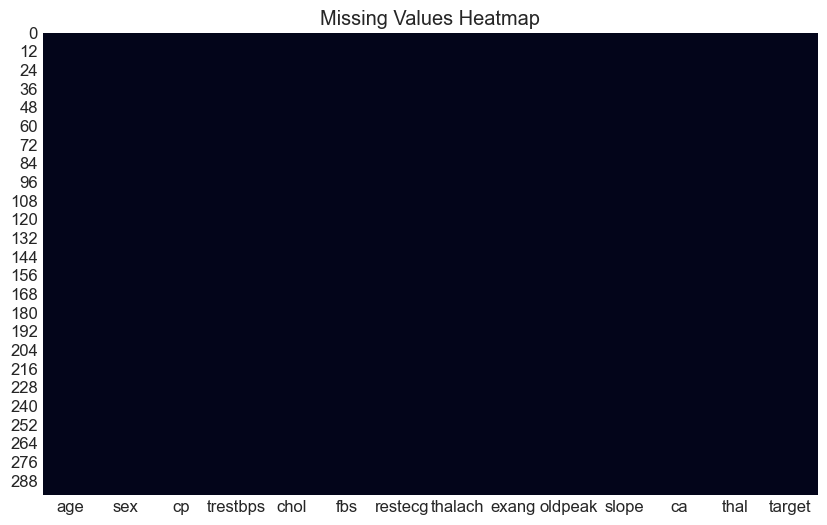

In [3]:
# Missing values
missing = df.isnull().sum()
print(missing[missing > 0])

# Visualize missing values if useful
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

## 2. Distribution Analysis

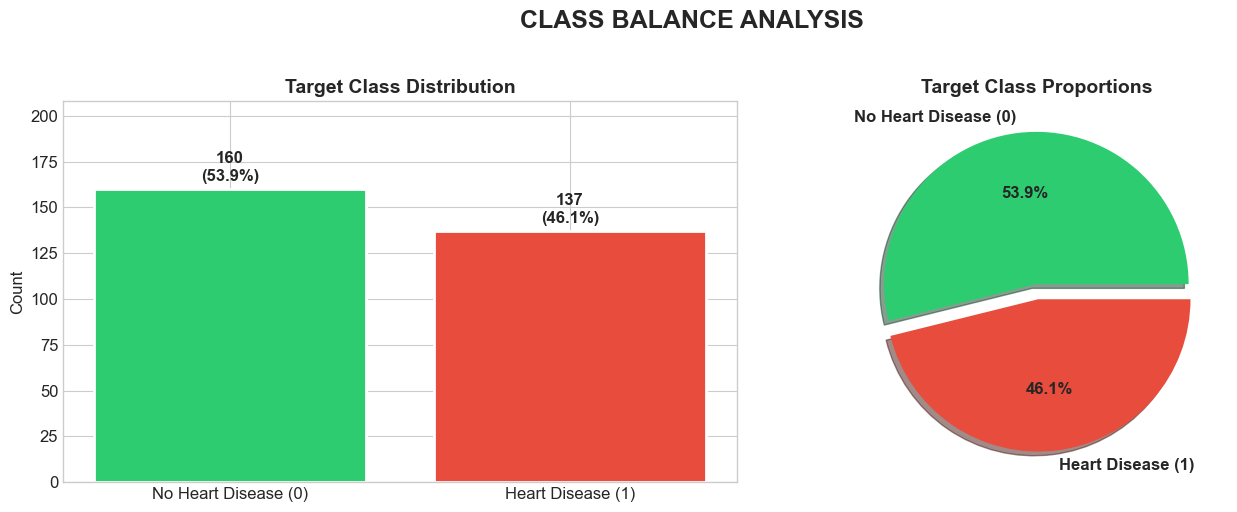


Class Distribution:
  No Heart Disease (0): 160 (53.9%)
  Heart Disease (1):    137 (46.1%)


In [4]:
# CLASS BALANCE ANALYSIS
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

target_counts = df['target'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for no disease, Red for disease
labels = ['No Heart Disease (0)', 'Heart Disease (1)']

# Bar plot
bars = axes[0].bar(labels, target_counts.values, color=colors, edgecolor='white', linewidth=2)
for bar, count in zip(bars, target_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3, 
                 f'{count}\n({count/len(df)*100:.1f}%)', 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')
axes[0].set_title('Target Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_ylim(0, max(target_counts.values) * 1.3)

# Pie chart
axes[1].pie(target_counts.values, labels=labels, autopct='%1.1f%%', 
            colors=colors, explode=(0.05, 0.05), shadow=True,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Target Class Proportions', fontsize=14, fontweight='bold')

plt.suptitle('CLASS BALANCE ANALYSIS', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../screenshots/class_balance.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nClass Distribution:")
print(f"  No Heart Disease (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
print(f"  Heart Disease (1):    {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")

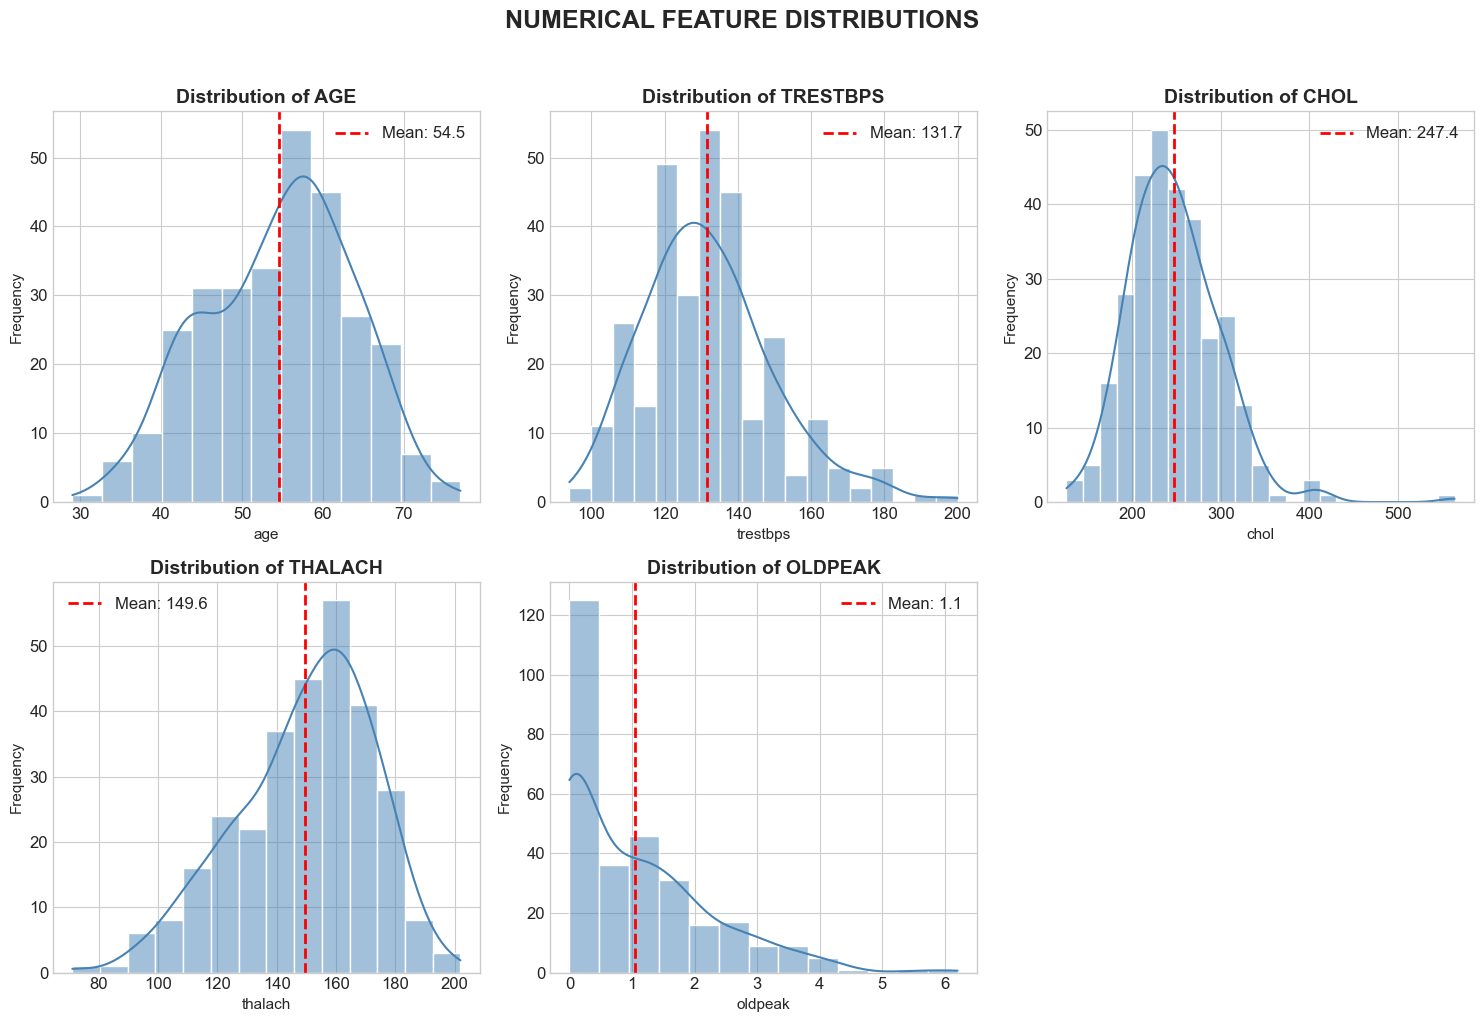

In [5]:
# NUMERICAL FEATURE DISTRIBUTIONS (HISTOGRAMS)
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=ax, color='steelblue', edgecolor='white')
    # Add mean line
    mean_val = df[col].mean()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.set_title(f'Distribution of {col.upper()}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col, fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.legend()

axes[-1].axis('off')  # Remove empty subplot

plt.suptitle('NUMERICAL FEATURE DISTRIBUTIONS', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../screenshots/numerical_histograms.png', dpi=150, bbox_inches='tight')
plt.show()

## 3. Correlation Analysis

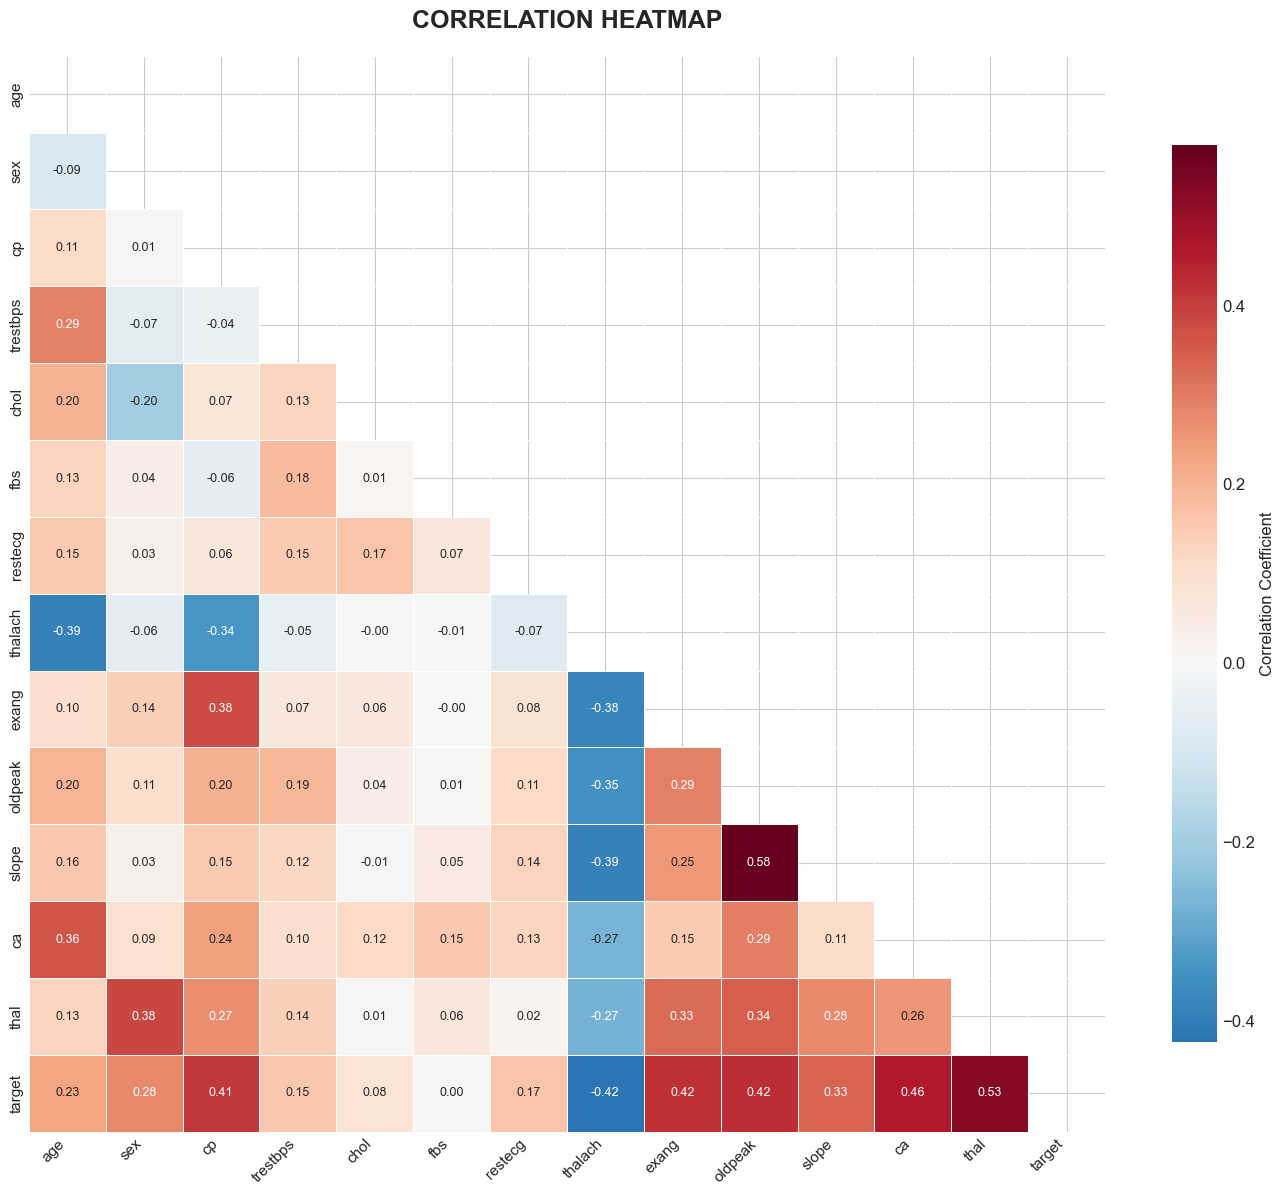


Top Correlations with Target (Heart Disease):
  thal        : +0.527 (↑ positive)
  ca          : +0.463 (↑ positive)
  oldpeak     : +0.424 (↑ positive)
  thalach     : -0.424 (↓ negative)
  exang       : +0.421 (↑ positive)
  cp          : +0.409 (↑ positive)


In [6]:
# CORRELATION HEATMAP
plt.figure(figsize=(14, 12))

correlation_matrix = df.corr()

# Create mask for upper triangle (cleaner look)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create professional heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
            annot_kws={'size': 9})

plt.title('CORRELATION HEATMAP', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('../screenshots/correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

# Show top correlations with target
print("\nTop Correlations with Target (Heart Disease):")
print("=" * 50)
target_corr = correlation_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
for feat, corr in target_corr.head(6).items():
    direction = "↑ positive" if corr > 0 else "↓ negative"
    print(f"  {feat:12s}: {corr:+.3f} ({direction})")

## 4. Automated Report

In [7]:
# EDA SUMMARY
print("=" * 60)
print("                 EDA KEY INSIGHTS SUMMARY")
print("=" * 60)

target_counts = df['target'].value_counts()

print(f"""
1. DATASET OVERVIEW:
   - Total samples: {len(df)}
   - Features: {len(df.columns)-1}
   - Target: Binary (0=No Disease, 1=Disease)
   - No missing values in cleaned data ✓

2. CLASS BALANCE:
   - No Disease: {target_counts[0]} samples ({target_counts[0]/len(df)*100:.1f}%)
   - Disease: {target_counts[1]} samples ({target_counts[1]/len(df)*100:.1f}%)
   - Dataset is relatively balanced ✓

3. NUMERICAL FEATURES (5):
   - age, trestbps, chol, thalach, oldpeak
   - Require StandardScaler for normalization

4. CATEGORICAL FEATURES (8):
   - sex, cp, fbs, restecg, exang, slope, ca, thal
   - Require OneHotEncoder for encoding

5. KEY CORRELATIONS WITH TARGET:
   - cp (chest pain type): Strong positive
   - thalach (max heart rate): Negative
   - exang (exercise angina): Positive
   - oldpeak (ST depression): Positive
   - ca (# major vessels): Positive

6. PREPROCESSING RECOMMENDATIONS:
   - Apply StandardScaler to numerical features
   - Apply OneHotEncoder to categorical features
   - No imputation needed (data already clean)
""")
print("=" * 60)
print("EDA Complete! Proceed to Feature Engineering & Modeling.")
print("=" * 60)

                 EDA KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   - Total samples: 297
   - Features: 13
   - Target: Binary (0=No Disease, 1=Disease)
   - No missing values in cleaned data ✓

2. CLASS BALANCE:
   - No Disease: 160 samples (53.9%)
   - Disease: 137 samples (46.1%)
   - Dataset is relatively balanced ✓

3. NUMERICAL FEATURES (5):
   - age, trestbps, chol, thalach, oldpeak
   - Require StandardScaler for normalization

4. CATEGORICAL FEATURES (8):
   - sex, cp, fbs, restecg, exang, slope, ca, thal
   - Require OneHotEncoder for encoding

5. KEY CORRELATIONS WITH TARGET:
   - cp (chest pain type): Strong positive
   - thalach (max heart rate): Negative
   - exang (exercise angina): Positive
   - oldpeak (ST depression): Positive
   - ca (# major vessels): Positive

6. PREPROCESSING RECOMMENDATIONS:
   - Apply StandardScaler to numerical features
   - Apply OneHotEncoder to categorical features
   - No imputation needed (data already clean)

EDA Complete! Proceed to Featu